<a href="https://colab.research.google.com/github/DaryaTereshchenko/ExperimentsUkr/blob/main/GaussianNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.pipeline import make_pipeline
import regex as re
import pandas as pd
import numpy as np

In [2]:
def plot(y_true, y_pred, labels=None, title="", cmap=plt.cm.Blues):
    con_mat_df = confusion_matrix(y_true, y_pred)
    con_mat_df = con_mat_df.astype('float') / con_mat_df.sum(axis=1)[:, np.newaxis]
    disp = ConfusionMatrixDisplay(confusion_matrix=con_mat_df, display_labels=labels)
    disp.plot(cmap=cmap)
    plt.title(title)

In [27]:
df = pd.read_csv("/content/drive/MyDrive/AnnotatedFull.csv")
clean = df["tweet"].apply(lambda x: re.sub(r'[^\w\s]', '', x).lower())

Models GaussianNB

In [35]:
count_vec = CountVectorizer()
bow = count_vec.fit_transform(clean)
bow = np.array(bow.todense())

In [29]:
vec = TfidfVectorizer()
tf_idf = vec.fit_transform(clean)
tf_idf = np.array(tf_idf.todense())

Train model

In [38]:
X = bow
y = df.label

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   random_state=42, 
                                   test_size=0.3, 
                                   shuffle=True)

In [40]:
model1 = GaussianNB().fit(X_train, y_train)
y_pred_model1 = model1.predict(X_test)

In [32]:
model2 = GaussianNB().fit(X_train, y_train)
y_pred_model2 = model2.predict(X_test)

Evaluation

In [41]:
print('Accuracy:', accuracy_score(y_test, y_pred_model1))
print('F1 score:', f1_score(y_test, y_pred_model1, average="macro"))
print(classification_report(y_test, y_pred_model1))

Accuracy: 0.7418300653594772
F1 score: 0.6323178243874246
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       465
           1       0.46      0.41      0.43       147

    accuracy                           0.74       612
   macro avg       0.64      0.63      0.63       612
weighted avg       0.73      0.74      0.74       612



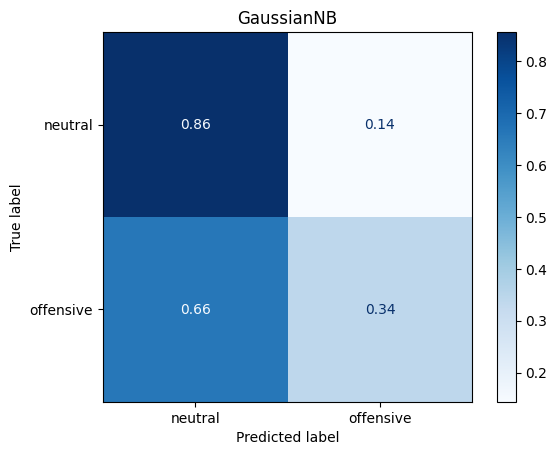

In [42]:
plot(y_test, y_pred_model2, labels=["neutral", "offensive"], title="GaussianNB")